# tables.ttools

Ttools is an IRAF library used to build and manipulate STSDAS tables.

<a id='notes'></a>

## Notes

**For questions or comments please see** [our github page](https://github.com/spacetelescope/stak).  **We encourage and appreciate user feedback.**

**Most of these notebooks rely on basic knowledge of the Astropy FITS I/O module.  If you are unfamiliar with this module please see the** [Astropy FITS I/O user documentation](http://docs.astropy.org/en/stable/io/fits/) **before using this documentation**.

Many of the table tools in this package are easily accessible with the [Astropy Table](http://docs.astropy.org/en/stable/table/) object.  Here we will show the ``Astropy`` ``Table`` equivalent of the ttools tasks. You can also find a lot of useful information about tables and more advanced read and write options on the [Unified I/O Astropy documentation page](http://docs.astropy.org/en/stable/io/unified.html).

Below we import the example table we will be using. **Before using some of the examples in this notebook you will need to setup the test table by running the code cell below**


Contents:

* [imtab-tabim](#imtab-tabim)
* [partab](#partab)
* [tabpar](#tabpar)
* [taextract-tainsert](#taextract-tainsert)
* [tcalc](#tcalc)
* [tchcol](#tchcol)
* [tcopy-tdump](#tcopy-tdump)
* [tdiffer](#tdiffer)
* [texpand](#texpand)
* [thhistogram](#thistogram)
* [tiimage-titable-tximage-txtable](#tiimage-titable-tximage-txtable)
* [tinfo-tlcol-tprint](#tinfo-tlcol-tprint)
* [tintegrate](#tintegrate)
* [tjoin](#tjoin)
* [tmatch](#tmatch)
* [tmerge](#tmerge)
* [tselect-tproject-tquery](#tselect-tproject-tquery)
* [tsort](#tsort)
* [tstat](#tstat)

In [1]:
#Here we import the example table we will be using from a text file:
from astropy.table import Table

filename = "/eng/ssb/iraf_transition/test_data/table2.txt"
ex_table = Table.read(filename, format='ascii')
ex_table

sname,radius,fwhm
str5,int64,float64
star1,10,6.5
star2,7,5.1
star3,2,0.5
star4,1,0.75
star5,20,13.0


<br>

<br>

<a id='imtab-tabim'></a>

## imtab-tabim

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Imtab can be used to copy an image to a table column.  We can accomplish this by first flattening the array (2D down to 1D), then putting it into a table. For more details see the [Table construction documentation](http://docs.astropy.org/en/stable/table/construct_table.html). Tabim is used to copy a column back to a table, as show below.

In [2]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.table import Table

In [61]:
# Create test array and flatten
image_array=np.random.rand(6,6)
image_array=image_array.flatten()

# Put into table, to make it a column we need the outside []
t = Table([image_array])
print(t)

# Now to re-extract the array we have to grab the 
# data and unflatten it. The column was given the 
# default name of col0 by Table
extract_array = t['col0'].data.reshape((6,6))
print(extract_array)

      col0     
---------------
  0.73498113873
 0.601683040128
 0.858365279296
 0.183850195764
 0.372479856903
 0.531179886849
 0.497759057246
  0.24850881731
 0.433906702747
0.0199450763848
            ...
0.0908400575378
 0.448676070596
 0.275824527206
 0.276164794467
 0.193654333786
 0.830174255037
 0.581290249067
 0.754640533974
 0.651459214252
 0.435245983443
  0.75900952991
Length = 36 rows
[[ 0.73498114  0.60168304  0.85836528  0.1838502   0.37247986  0.53117989]
 [ 0.49775906  0.24850882  0.4339067   0.01994508  0.4251196   0.53538164]
 [ 0.8670757   0.38572518  0.39294164  0.34951696  0.53854753  0.8362706 ]
 [ 0.68752468  0.4442957   0.33628146  0.75661578  0.87014016  0.88223051]
 [ 0.3725361   0.09084006  0.44867607  0.27582453  0.27616479  0.19365433]
 [ 0.83017426  0.58129025  0.75464053  0.65145921  0.43524598  0.75900953]]


<br>

<a id='partab'></a>

## partab

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Partab is used to transfer an IRAF parameter to a table element. Below we show the ``Astropy Table`` equivalent using indexing.  See the [Modifying Table](http://docs.astropy.org/en/stable/table/modify_table.html) documentation for more details.

In [3]:
# Astronomy Specific Imports
from astropy.table import Table

In [4]:
ex_table['fwhm'][4]=4.5
ex_table

sname,radius,fwhm
str5,int64,float64
star1,10,6.5
star2,7,5.1
star3,2,0.5
star4,1,0.75
star5,20,4.5


<br>

<a id='tabpar'></a>

## tabpar

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The tabpar task takes a header keyword and moves it to an IRAF parameter.  Extracting values from an astropy table is straightfoward with indexing. Keep in mind the indexing is zero based. When an FITS file is read into a table, the header information is saved in the metadata as an ``Ordered Dictionary``.  Below we show you how to pull values from the table data, and metadata.

In [31]:
# Astronomy Specific Imports
from astropy.table import Table

In [32]:
# Pulling a column out of a table
column=ex_table['sname']
print(column)

# Pulling a value out of a table
entry=ex_table['radius'][2]
print('\n')
print(entry)

sname
-----
star1
star2
star3
star4
star5


2


In [11]:
# Pulling values out of the metadata
fits_file = '/eng/ssb/iraf_transition/test_data/08b18470j_imp.fits'
fits_table = Table.read(fits_file, hdu=2)
print(fits_table.meta)
print(fits_table.meta['EXTNAME'])

OrderedDict([('EXTNAME', 'PHOTPLAM'), ('EXTVER', 1)])
PHOTPLAM


<br>

<a id='taextract-tainsert'></a>

## taextract-tainsert

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Taextract and tainsert are used to copy scalar columns to array entries, and vice versa.  We will show how to store an array in an ``Astropy Table`` from a ``list`` of scalars.

In [12]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.table import Table

In [70]:
scalar_list = [4,5,6,7,8,9]

# Change to numpy array
in_arr = np.array(scalar_list)

# Store in table
t = Table([in_arr])
t.pprint()

print("\n")

# Now extract array back to scalar list, flatten will take out the extra dimension
out_arr = t['col0'].data
print(out_arr)

col0
----
   4
   5
   6
   7
   8
   9


[4 5 6 7 8 9]


<br>

<a id='tcalc'></a>

## tcalc

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tcalc is used to perform arithmetic operations on table columns. This can be done automatically with any compatible data types. A new ``Column`` object will be returned, which you can add back into the original Table, or a new Table as desired.  See the [Table modification documentation](http://docs.astropy.org/en/stable/table/modify_table.html) for more details.

In [63]:
# Astronomy Specific Imports
from astropy.table import Table

In [67]:
out_column = ex_table['radius'] + ex_table['fwhm']
out_column.name = 'radfw'
print(out_column)

radfw
-----
 16.5
 12.1
  2.5
 1.75
 24.5


<br>

<a id='tchcol'></a>

## tchcol

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

tchcol is used to change the column name, format or units.  This can be done easily with ``Astropy Tables``, and the [Astropy Units](http://docs.astropy.org/en/stable/units/) module.

In [41]:
# Astronomy Specific Imports
from astropy.table import Table
import astropy.units as u
import numpy as np

In [45]:
# Set filename, read in file
filename = "/eng/ssb/iraf_transition/test_data/table2.txt"
ed_table = Table.read(filename, format='ascii')

# To get table info
print(ed_table.info)

# To add/update units
ed_table['radius'].unit = u.astrophys.pix
print(ed_table.info)

# To change column name
ed_table['radius'].name='radius(pix)'
print(ed_table.info)

# To change dtype
ed_table['radius(pix)'] = ed_table['radius(pix)'].astype(float)
print(ed_table.info)

print(ed_table)

<Table length=5>
 name   dtype 
------ -------
 sname    str5
radius   int64
  fwhm float64

<Table length=5>
 name   dtype  unit
------ ------- ----
 sname    str5     
radius   int64  pix
  fwhm float64     

<Table length=5>
    name     dtype  unit
----------- ------- ----
      sname    str5     
radius(pix)   int64  pix
       fwhm float64     

<Table length=5>
    name     dtype  unit
----------- ------- ----
      sname    str5     
radius(pix) float64  pix
       fwhm float64     

sname radius(pix) fwhm
          pix         
----- ----------- ----
star1        10.0  6.5
star2         7.0  5.1
star3         2.0  0.5
star4         1.0 0.75
star5        20.0 13.0


<br>

<a id='tcopy-tdump'></a>

## tcopy-tdump

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tcopy is used to copy tables, and can save a table to ASCII or FITS format.  Similarly, tdump is used to save a table to an ASCII file. We will show both save methods and a copy below.  For more details see the [unified read/write](http://docs.astropy.org/en/stable/io/unified.html) documentation. For more details on ``Table`` object copying see the [copy versus reference](http://docs.astropy.org/en/stable/table/construct_table.html#copy-versus-reference) doc section.

Please be aware that there are many possible ASCII write formats provided by Astropy, [listed here](http://docs.astropy.org/en/stable/io/ascii/index.html#supported-formats). In this example we use the default basic formatting.

In [10]:
# Astronomy Specific Imports
from astropy.table import Table

In [11]:
# Make a copy of our example table
tab_copy = ex_table.copy()

# Save as ASCII
outfile = 'copy_table.txt'
tab_copy.write(outfile, format='ascii', overwrite=True)

# Same method call to write to FITS
outfits = 'copy_table.fits'
tab_copy.write(outfits, overwrite=True)

<br>

<a id='tdiffer'></a>

## tdiffer

Tdiffer is used to create an output table that is the difference of two tables.  Astropy has this functionality in the [setdiff function](http://docs.astropy.org/en/stable/api/astropy.table.setdiff.html).

In [12]:
from astropy.table import Table
from astropy.table import setdiff

In [16]:
# Setup sample tables
t1 = Table({'a': [1, 4, 9], 'b': ['c', 'd', 'f']}, names=('a', 'b'))
t2 = Table({'a': [1, 5, 9], 'b': ['c', 'b', 'f']}, names=('a', 'b'))

print("table 1: \n{}\n".format(t1))
print("table 2: \n{}\n".format(t2))

# Calculate and print the difference between tables
print("table diff t1-t2")
print(setdiff(t1, t2))

# Same, but t2-t1 instead of t1-t2
print("table diff t2-t1")
print(setdiff(t2, t1))

table 1: 
 a   b 
--- ---
  1   c
  4   d
  9   f

table 2: 
 a   b 
--- ---
  1   c
  5   b
  9   f

table diff t1-t2
 a   b 
--- ---
  4   d
table diff t2-t1
 a   b 
--- ---
  5   b


<br>

<a id='texpand'></a>

## texpand

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Texpand is used to edit and change tables according to a set of user provided rules.  This can be done by building a customized loop over the input table.  Below we show a simple example, but this can be easily modified to fit the users needs.

In [21]:
# Astronomy Specific Imports
from astropy.table import Table

In [17]:
# Change star1 and star2 to a raidus of 10
# Making a copy of the table for editing
new_table = ex_table.copy()
# Loops over the rows in the table
for row in new_table:
    # here we index the columns with numbers
    if row[0] in ['star1','star3']:
        row[1]= 10
print(new_table)

sname radius fwhm
----- ------ ----
star1     10  6.5
star2      7  5.1
star3     10  0.5
star4      1 0.75
star5     20  4.5


<br>

<a id='thistogram'></a>

## thistogram

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Thistogram makes a histogram from a data column in a table.  We can easily accomplish this using the ``Astropy Tables`` and [Matplotlib.pyplot.hist](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html) tasks. For this example we will use the default binning. There is also an [Astropy histogram](http://docs.astropy.org/en/stable/api/astropy.stats.histogram.html) and a [Numpy histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) available for generating the histogram data.

In [19]:
# Astronomy Specific Imports
from astropy.table import Table

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

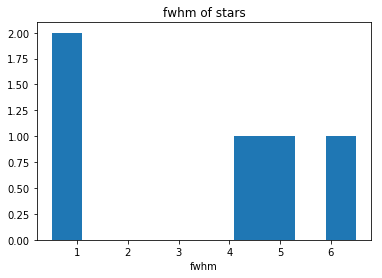

In [20]:
# Using the weight column of our example table
n, bins, patches = plt.hist(ex_table['fwhm'].data)

plt.xlabel('fwhm')
plt.title('fwhm of stars')
plt.show()

<br>

<br>

<a id='tiimage-titable-tximage-txtable'></a>

## tiimage-titable-tximage-txtable

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tiimage, titable, tximage, and txtable are all 3-D table functions.  ``Astropy`` ``Table`` objects can store any dimension ``numpy`` arrays in each element, as long as the columns are consistent.  Below we show a short example of storing a 3-D array in an ``Astropy`` Table. Other table functionality behaves the same for 2-D and 3-D table data.

In [27]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.table import Table

In [28]:
# Storing a 2-D arrays in one column of a table
arr1 = np.random.rand(60,90)
arr2 = np.random.rand(60,90)
# To retain the 2-D array as an element in the table, make sure you use two sets of square brackets
three_table = Table([[arr1,arr2]],names=('Arrays',))
three_table.pprint()

# To pull out one array element, index column name then row numbers
three_table['Arrays'][1]

         Arrays [60,90]         
--------------------------------
0.892760413585 .. 0.283382986211
0.637760881193 .. 0.363642899902


array([[ 0.63776088,  0.91520904,  0.02255264, ...,  0.68817791,
         0.53479407,  0.30667641],
       [ 0.97267867,  0.55856732,  0.86993039, ...,  0.91039544,
         0.63862112,  0.58102198],
       [ 0.51181066,  0.85164649,  0.05432316, ...,  0.36084783,
         0.58934112,  0.96374561],
       ..., 
       [ 0.83594372,  0.79412333,  0.78455287, ...,  0.88604032,
         0.16606121,  0.1500973 ],
       [ 0.81858617,  0.16964881,  0.00841479, ...,  0.66355838,
         0.95266558,  0.79603504],
       [ 0.81294063,  0.79609841,  0.58490711, ...,  0.3697692 ,
         0.65451337,  0.3636429 ]])

<br>

<a id='tinfo=tlcol-tprint'></a>

## tinfo-tlcol-tprint

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tinfo, tlcol and tprint were all used to display information about the table.  Below we show the ``Astropy Table`` equivalents, including ``showtable`` which is callable from the terminal.

In [21]:
# Astronomy Specific Imports
from astropy.table import Table

In [22]:
# For tinfo and tlcol
print(ex_table.info)

<Table length=5>
 name   dtype 
------ -------
 sname    str5
radius   int64
  fwhm float64



In [23]:
# For tprint
ex_table.pprint()

sname radius fwhm
----- ------ ----
star1     10  6.5
star2      7  5.1
star3      2  0.5
star4      1 0.75
star5     20  4.5


In [37]:
# To print a specific subset of the table
# Here we pull out the sname and fwhm columns
# and rows 1-3
ex_table['sname','fwhm'][0:3]

sname,fwhm
str5,float64
star1,6.5
star2,5.1
star3,0.5


In [4]:
# To print a table outside of a Python interpreter
# Astropy has added the convenience function showtable
!showtable --format ascii /eng/ssb/iraf_transition/test_data/table2.txt

sname radius fwhm
----- ------ ----
star1     10  6.5
star2      7  5.1
star3      2  0.5
star4      1 0.75
star5     20 13.0


In [5]:
# Here is the showtable help for more details on usage
!showtable --help

usage: showtable [-h] [--format FORMAT] [--more] [--info] [--stats]
                 [--max-lines MAX_LINES] [--max-width MAX_WIDTH] [--hide-unit]
                 [--show-dtype] [--delimiter DELIMITER] [--hdu HDU]
                 [--path PATH] [--table-id TABLE_ID]
                 filename [filename ...]

Print tables from ASCII, FITS, HDF5, VOTable file(s). The tables are read with
'astropy.table.Table.read' and are printed with 'astropy.table.Table.pprint'.
The default behavior is to make the table output fit onto a single screen
page. For a long and wide table this will mean cutting out inner rows and
columns. To print **all** the rows or columns use ``--max-lines=-1`` or ``max-
width=-1``, respectively. The complete list of supported formats can be found
at http://astropy.readthedocs.io/en/latest/io/unified.html#built-in-table-
readers-writers

positional arguments:
  filename              path to one or more files

optional arguments:
  -h, --help            show this help mess

<br>

<a id='tintegrate'></a>

## tintegrate

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tintegrate is used to numerically integrate one column with respect to another.  This can be done using the [numpy.traz function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html). As we have shown how to extract an array from a Table in various other tasks in this notebook we will only cover the integration step here.

In [34]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.table import Table

In [35]:
# Setup array, here you would pull from a table
x = [1, 2, 3, 4, 6]
y = [10.5, 12.3, 22.2, 13.3, 7.7]

result = np.trapz(y,x)
print(result)

67.4


<br>

<a id='tjoin'></a>

## tjoin

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tjoin is used to perform a relational join of two tables. You can do all join types (inner, left, right, and outer) in the Astropy ``Tables`` package, see [join docs here](http://docs.astropy.org/en/stable/table/operations.html#join) for more details.  We take the examples shown here from the Astropy docs.

In [36]:
# Astronomy Specific Imports
from astropy.table import Table, join

In [37]:
# Setup tables
optical = Table.read("""name    obs_date    mag_b  mag_v
                        M31     2012-01-02  17.0   16.0
                        M82     2012-10-29  16.2   15.2
                        M101    2012-10-31  15.1   15.5""", format='ascii')
xray = Table.read("""   name    obs_date    logLx
                        NGC3516 2011-11-11  42.1
                        M31     1999-01-05  43.1
                        M82     2012-10-29  45.0""", format='ascii')

In [38]:
# Default inner join, default key column to set of columns that are common to both tables.
opt_xray = join(optical, xray)
print(opt_xray)

name  obs_date  mag_b mag_v logLx
---- ---------- ----- ----- -----
 M82 2012-10-29  16.2  15.2  45.0


In [39]:
# Left join
print(join(optical, xray, join_type='left'))

name  obs_date  mag_b mag_v logLx
---- ---------- ----- ----- -----
M101 2012-10-31  15.1  15.5    --
 M31 2012-01-02  17.0  16.0    --
 M82 2012-10-29  16.2  15.2  45.0


In [40]:
# Right join, with only name field as key
print(join(optical, xray, join_type='right', keys='name'))

  name  obs_date_1 mag_b mag_v obs_date_2 logLx
------- ---------- ----- ----- ---------- -----
    M31 2012-01-02  17.0  16.0 1999-01-05  43.1
    M82 2012-10-29  16.2  15.2 2012-10-29  45.0
NGC3516         --    --    -- 2011-11-11  42.1


In [41]:
# Outer join
print(join(optical, xray, join_type='outer'))

  name   obs_date  mag_b mag_v logLx
------- ---------- ----- ----- -----
   M101 2012-10-31  15.1  15.5    --
    M31 1999-01-05    --    --  43.1
    M31 2012-01-02  17.0  16.0    --
    M82 2012-10-29  16.2  15.2  45.0
NGC3516 2011-11-11    --    --  42.1


<br>

<a id='tmatch'></a>

## tmatch

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tmatch is used to find the closest match between rows in two tables.  This functionality is contained in the [coordinates package](http://docs.astropy.org/en/stable/coordinates/matchsep.html) of Astropy. This example is taken from the [Coordinates notebook](http://www.astropy.org/astropy-tutorials/Coordinates.html), please see the notebook for more details before expanding this example to suit your needs.

In [34]:
# Astronomy Specific Imports
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

In [36]:
# Open table files
file1 = '/eng/ssb/iraf_transition/test_data/HCG7_SDSS_photo.dat'
file2 = '/eng/ssb/iraf_transition/test_data/HCG7_2MASS.tbl'
sdss = Table.read(file1, format='ascii')
twomass = Table.read(file2, format='ascii')

# Match between catalogs
coo_sdss = SkyCoord(sdss['ra']*u.deg, sdss['dec']*u.deg)
coo_twomass = SkyCoord(twomass['ra'], twomass['dec'])
idx_sdss, d2d_sdss, d3d_sdss = coo_twomass.match_to_catalog_sky(coo_sdss)

# Print matches
print("Matched values by index: \n")
print(idx_sdss)

Matched values by index: 

[368 370   6 116 255 454 501  41 174 505  13 515 624 523 338 297 389 294
 573 539 500 140 622]


<br>

<a id='tmerge'></a>

## tmerge

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tmerge is used to combine columns or rows of multiple tables. There are two [Astropy Table tasks](http://docs.astropy.org/en/stable/table/operations.html) for this, ``vstack`` and ``hstack``. We take these examples from the Astropy table docs.

In [44]:
# Astronomy Specific Imports
from astropy.table import Table, vstack, hstack

In [45]:
# Setup tables
obs1 = Table.read("""name    obs_date    mag_b  logLx
                     M31     2012-01-02  17.0   42.5
                     M82     2012-10-29  16.2   43.5
                     M101    2012-10-31  15.1   44.5""", format='ascii')

obs2 = Table.read("""name    obs_date    logLx
                     NGC3516 2011-11-11  42.1
                     M31     1999-01-05  43.1
                     M82     2012-10-30  45.0""", format='ascii')

# Vertical stack
print(vstack([obs1, obs2]))

  name   obs_date  mag_b logLx
------- ---------- ----- -----
    M31 2012-01-02  17.0  42.5
    M82 2012-10-29  16.2  43.5
   M101 2012-10-31  15.1  44.5
NGC3516 2011-11-11    --  42.1
    M31 1999-01-05    --  43.1
    M82 2012-10-30    --  45.0


In [46]:
# Setup tables
t1 = Table.read("""a   b    c
                   1   foo  1.4
                   2   bar  2.1
                   3   baz  2.8""", format='ascii')
t2 = Table.read("""d     e
                   ham   eggs
                   spam  toast""", format='ascii')

# Horizontal stack
print(hstack([t1, t2]))

 a   b   c   d     e  
--- --- --- ---- -----
  1 foo 1.4  ham  eggs
  2 bar 2.1 spam toast
  3 baz 2.8   --    --


<br>

<a id='tselect-tproject-tquery'></a>

## tselect-tproject-tquery

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tselect is used to create a new table from selected rows, tproject from selected columns, and tquery from a combination of selected rows and columns.  We show two examples of how to generate a new table from selected columns and selected rows.  You can combine these two pieces of code in either order to get a tquery like result. For row filtering we combine boolean masks using the [Python bitwise operators](https://docs.python.org/3.5/library/stdtypes.html#bitwise-operations-on-integer-types). There is an alternate way to do selections if you have already organized your table into groups by using the [filter method](http://docs.astropy.org/en/stable/table/operations.html#filtering), but the user will still need to write a custom filtering function to provide to ``filter``.

In [35]:
# Astronomy Specific Imports
from astropy.table import Table

In [33]:
# For selecting rows can use bitwise operators to generate a boolean mask
table1 = Table(dtype=ex_table.dtype)
boolean_mask = (ex_table['sname'] == 'star4') | (ex_table['radius'] == 20)

# 
subset = ex_table[boolean_mask]
subset.pprint()

sname radius fwhm
----- ------ ----
star4      1 0.75
star5     20 13.0


In [37]:
# For selecting columns we can pull the required columns 
# out of the original table with the column names
table2 = ex_table['sname','fwhm']
table2.pprint()

sname fwhm
----- ----
star1  6.5
star2  5.1
star3  0.5
star4 0.75
star5 13.0


<br>

<a id='tsort'></a>

## tsort

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tsort, as you would guess, sorts a table.  ``Astropy`` ``Table`` objects have a built in [sort method](http://docs.astropy.org/en/stable/table/modify_table.html). You can even sort by more then one column. Sorting is preformed inplace so in this example we make a copy of the table first.

In [50]:
# Standard Imports
import numpy as np

# Astronomy Specific imports
from astropy.table import Table

In [73]:
# Sorting
sorted_table = ex_table.copy()
sorted_table.sort('radius')
sorted_table.pprint()

print('\n')

# Reverse the sort
sorted_table.reverse()
sorted_table.pprint()

print('\n')

# Sort by more then one column
sorted_table.sort(['radius','fwhm'])
sorted_table.pprint()

sname radius fwhm
----- ------ ----
star4      1 0.75
star3      2  0.5
star2      7  5.1
star1     10  6.5
star5     20  4.5


sname radius fwhm
----- ------ ----
star5     20  4.5
star1     10  6.5
star2      7  5.1
star3      2  0.5
star4      1 0.75


sname radius fwhm
----- ------ ----
star4      1 0.75
star3      2  0.5
star2      7  5.1
star1     10  6.5
star5     20  4.5


<br>

<a id='tstat'></a>

## tstat

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tstat gives you the mean, standard deviation, minimum and maximum of a column.  This can be done by using the `Table` [info function](http://docs.astropy.org/en/stable/table/access_table.html#summary-information), with the 'stats' argument.

In [47]:
# Astronomy Specific Imports
from astropy.table import Table

In [54]:
# All column stats
ex_table.info('stats')

print("\n")

# Specific column stats
ex_table['radius'].info('stats')

<Table length=5>
 name  mean      std      min max
------ ---- ------------- --- ---
 sname   --            --  --  --
radius  8.0 6.84105255059   1  20
  fwhm 3.47 2.41321362502 0.5 6.5


name = radius
mean = 8.0
std = 6.84105255059
min = 1
max = 20
n_bad = 0
length = 5


<br>

<br>

## Not Replacing

* gtedit - Graphically edit a table. Deprecated.
* gtpar - Pset to specify graph parameters for gtedit task. Deprecated.
* keytab - Copy n image or table header keyword to a table element. See [Astropy Tables](http://docs.astropy.org/en/stable/table/index.html) documentation.
* keypar - Copy an image or table header keyword to an IRAF parameter. See [Astropy FITS](http://docs.astropy.org/en/stable/io/fits/) documentation.
* keyselect - Copy selected image header keywords to sdas table. See **images.imutil**
* parkey - Put an IRAF parameter into an image or table header keyword. See [Astropy FITS](http://docs.astropy.org/en/stable/io/fits/) documentation.
* tabkey - Copy a table element to an image or table header keyword. See the above notebook and [Astropy FITS](http://docs.astropy.org/en/stable/io/fits/) documentation.
* tcheck - Check STSDAS table element values. See [Astropy Tables](http://docs.astropy.org/en/stable/table/index.html) documentation.
* tchsize - Change allocated sizes of various sections of a table. Deprecated.
* tcreate - Create a FITS table from an ASCII descriptor table. see [tcopy-tdump](#tcopy-tdump) and [Unified I/O](http://docs.astropy.org/en/stable/io/unified.html#fits) documentation.
* tdelete - Delete tables. Deprecated.
* tedit - Edit a table. See [Astropy Tables](http://docs.astropy.org/en/stable/table/index.html) documentation or [partab](#partab).
* thedit - Edit or print table header keywords. See **images.imutil.hedit**
* thselect - Print table keyword values. See **images.imutil.hselect**
* tlinear - Use linear regression to fit one or two table columns. See **images.imfit.fit1d**
* tproduct - Form the Cartesian product of two tables. See [tjoin](#tjoin)
* Trebin  - Allows the user to rebin columns in a table using linear or spline interpolation. See the [Astropy binning doc section](http://docs.astropy.org/en/stable/table/operations.html#binning) for a subset of this functionality.
* tread - Browse through a table. See [Astropy Tables](http://docs.astropy.org/en/stable/table/index.html) documentation.
* tscopy - Copy row/column subsets of tables using selectors. See [tselect-tproject-tquery](#tselect-tproject-tquery).
* ttranspose - Transpose or flip a table. Deprecated.
* tupar - Edit table header keywords. Interactive GUI. Deprecated
* tupar - Edit table header keywords. Interactive GUI. See [tchcol](#tchcol)